In [1]:
import os
print(os.getcwd()) #print working dir
# import matplotlib
from matplotlib import rc
rc('text', usetex=True)
# matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time
import pandas as pd


os.sys.path.insert(0, '../src/')
import analyze_utilities
from importlib import reload
reload(analyze_utilities)
%run ./result_summary.ipynb

output_path = '../results/figures/rebuttal'
is_plot_title = False
is_save_fig = True

# print(plt.style.available)
# print(plt.rcParams)
plt.style.use(['seaborn-darkgrid', 'seaborn-paper'])
label_size = 18
tick_size = 14
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=label_size)
plt.rc('axes', labelsize=label_size)
plt.rc('xtick', labelsize=tick_size)
plt.rc('ytick', labelsize=tick_size)

C:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml\notebooks
Loading paths from result_summary.ipynb


## Create Histograms

In [29]:
def load_diff_df(files_l, log_flag = False, unnormallized_nml_flag = False):
    print(files_l)
    # Load difference df
    results_dict = analyze_utilities.load_dict_from_file_list(files_l)
    nml_df = analyze_utilities.result_dict_to_nml_df(results_dict)
    erm_df = analyze_utilities.result_dict_to_erm_df(results_dict)
    print("log_flag: {} unnormallized_nml_flag: {}".format(log_flag, unnormallized_nml_flag))
    diff_df = analyze_utilities.calc_nml_change_per_label(nml_df, erm_df, log_flag, unnormallized_nml_flag)
    return diff_df
    
def plt_diff_hist(diff_df, log_flag = False):
    # Plot diff of diff histogram
    bins = 20
    plt.hist(diff_df.loc[diff_df['is_correct_erm'],'true_minus_adv_improve'], alpha=0.5, density=True, label='Correct', bins=bins)
    plt.hist(diff_df.loc[~diff_df['is_correct_erm'],'true_minus_adv_improve'], alpha=0.5, density=True, label='Incorrect', bins=bins)
    plt.ylabel('Density (symlog scale)')
    if log_flag:
        plt.xlabel('delta(-logP(true)) - delta(-logP(adversarial))')
    else:
        plt.xlabel(r'$\Delta_1 - \Delta_2$')
#     plt.xlim(left=-0.1)
#     plt.ylim(top=10)
    plt.yscale('symlog')
    plt.title('Regret Histogram of natural and adversarial MNIST') if is_plot_title else None
    plt.legend(fontsize=14)
    plt.savefig(os.path.join(output_path, 'fig_delta_true_minus_delta_adversarial.jpeg'),
                dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
    plt.show()

    # Plot diff histogram of Ture and Adversarial labels
    plt.hist(diff_df['true_label_diff'], alpha=0.5, density=True, label='True label', bins=bins)
    plt.hist(diff_df['adv_label_diff'], alpha=0.5, density=True, label='Adversarial label', bins=bins)
    if log_flag:
        plt.xlabel(r'delta(-logP)') 
    else:
        plt.xlabel(r'delta(P)')
    plt.legend(fontsize=14)
    plt.show()

    # Plot diff histogram of True correct and True incorrect
    plt.hist(diff_df.loc[diff_df['is_correct_erm'],'true_label_diff'], alpha=0.5, density=True, label='Correct - True label', bins=bins)
    plt.hist(diff_df.loc[~diff_df['is_correct_erm'],'true_label_diff'], alpha=0.5, density=True, label='Incorrect - True label', bins=bins)
    plt.ylabel('Density (symlog scale)')
    if log_flag:
        plt.xlabel('delta(-logP)') #
    else:
        plt.xlabel(r'$\Delta_1 = p_{w0}(y_{true}|x_{refine}(x,y_{true})) - p_{w0}(y_{true}|x)$')
    
    plt.legend(fontsize=14)
    plt.savefig(os.path.join(output_path, 'fig_delta_true.jpeg'),
            dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
    plt.show()
    
    
    # Plot diff histogram of Target label(Adversarial) successful and unsuccessful
    plt.hist(diff_df.loc[diff_df['is_correct_erm'],'adv_label_diff'], alpha=0.5, density=True, label='Unsuccessful adversarial', bins=bins)
    plt.hist(diff_df.loc[~diff_df['is_correct_erm'],'adv_label_diff'], alpha=0.5, density=True, label='Successful adversarial', bins=bins)
    plt.ylabel('Density (symlog scale)')
    if log_flag:
        plt.xlabel('delta(-logP)')#
    else:
        plt.xlabel(r'$\Delta_2 =  p_{w0}(y_{target}|x_{refine}(x,y_{target})) - p_{w0}(y_{target}|x)$') #q_{pNML}(y_{target})
    
    plt.legend(fontsize=14)
    plt.savefig(os.path.join(output_path, 'fig_delta_target.jpeg'),
        dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
    plt.show()
    
    # Plot diff histogram of Other label
    plt.hist(diff_df['other_label_diff'], alpha=0.5, density=True, label='Other label', bins=bins)
    plt.ylabel('Density (symlog scale)')
    if log_flag:
        plt.xlabel('delta(-logP)')#
    else:
        plt.xlabel(r'$\Delta_3 =  p_{w0}(y_{true}|x_{refine}(x,y_{other})) - p_{w0}(y_{other}|x)$')
    
    plt.legend(fontsize=14)
    plt.savefig(os.path.join(output_path, 'fig_delta_other.jpeg'),
        dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
    plt.show()


## MNIST

### MNIST PGD_PGD

In [3]:
log_flag = False
unnormallized_nml_flag = True
diff_pgd_pgd = load_diff_df(mnist_pgd_pgd_fgsm_all, log_flag, unnormallized_nml_flag) 

['./../results/paper/MNIST/mnist_adversarial_results_20190802_151544/results_mnist_adversarial_20190802_151544.json']
log_flag: False unnormallized_nml_flag: True
number of idxs to replace to second largest: 9051


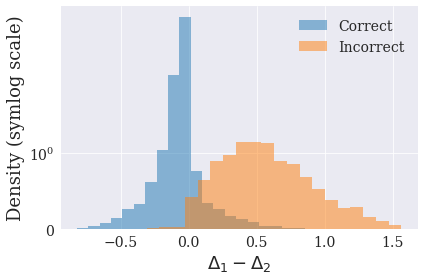

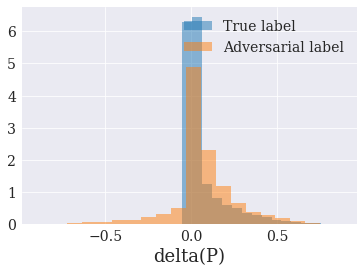

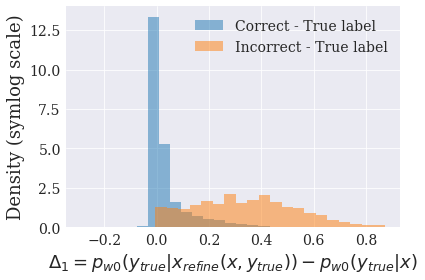

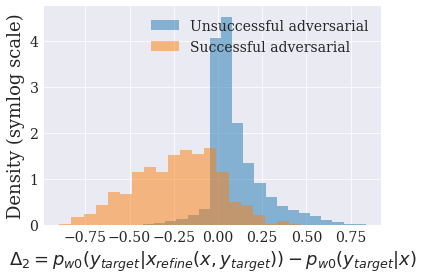

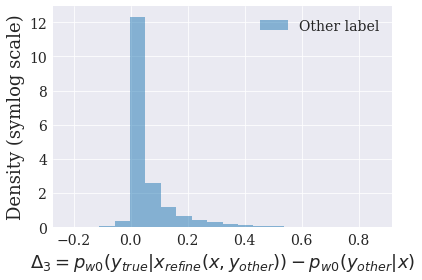

In [30]:
plt_diff_hist(diff_pgd_pgd, log_flag)

### MNIST PGD_FGSM

In [36]:
log_flag = False
unnormallized_nml_flag = True
diff_df_fgsm_fgsm = load_diff_df(mnist_pgd_fgsm_fgsm_all, log_flag, unnormallized_nml_flag) 

['./../results/paper/MNIST/mnist_adversarial_results_20190802_143802/results_mnist_adversarial_20190802_143802.json']
log_flag: False unnormallized_nml_flag: True
number of idxs to replace to second largest: 9577


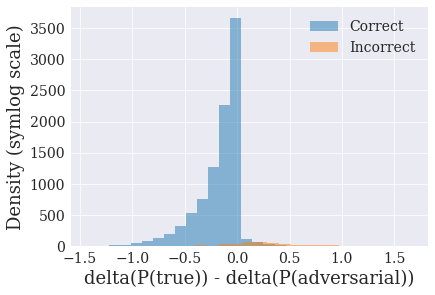

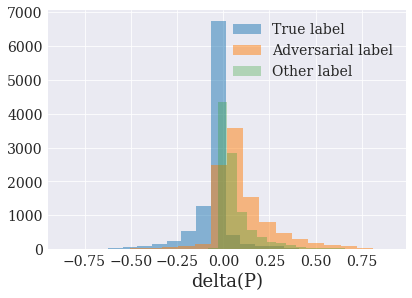

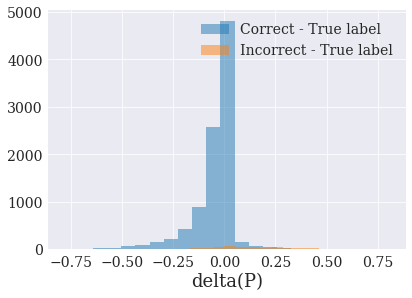

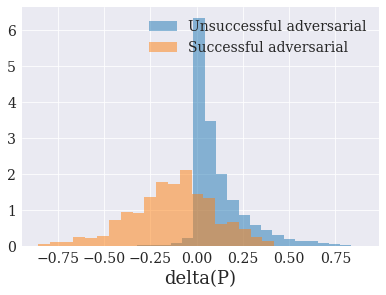

In [37]:
plt_diff_hist(diff_df_fgsm_fgsm, log_flag)

### MNIST PGD_Natural

In [38]:
log_flag = False
unnormallized_nml_flag = True
diff_df_natural_fgsm = load_diff_df(mnist_pgd_natural_fgsm_all, log_flag, unnormallized_nml_flag) 

['./../results/paper/MNIST/mnist_adversarial_results_20190802_153819/results_mnist_adversarial_20190802_153819.json']
log_flag: False unnormallized_nml_flag: True
number of idxs to replace to second largest: 9832


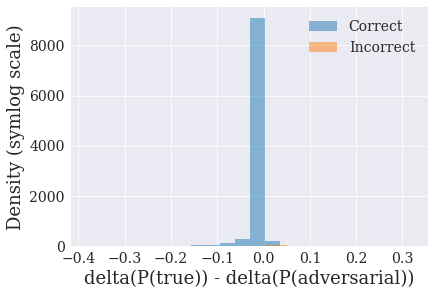

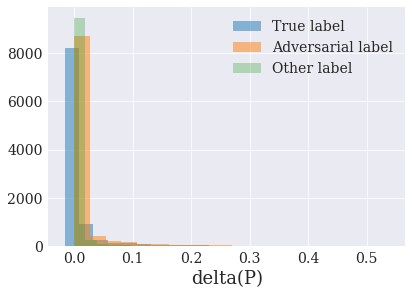

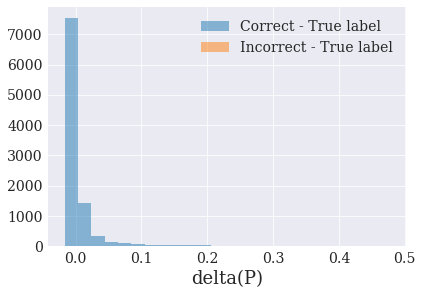

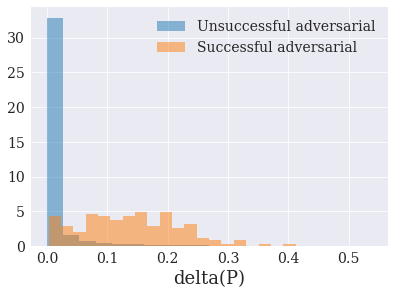

In [39]:
plt_diff_hist(diff_df_natural_fgsm, log_flag)

### FGSM_FGSM
Shows that FGSM traine model doesn't work for adversarial pNML because adversarial probability has increased regardless if the adversarial example is successful or unsuccessful

In [7]:
log_flag = False
unnormallized_nml_flag = True
diff_df_fgsm_fgsm = load_diff_df(mnist_fgsm_fgsm_fgsm_all, log_flag, unnormallized_nml_flag) 

['./../results/paper/MNIST/mnist_adversarial_results_20190801_192015/results_mnist_adversarial_20190801_192015.json']
log_flag: False unnormallized_nml_flag: True
number of idxs to replace to second largest: 9767


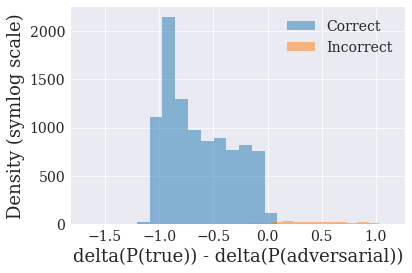

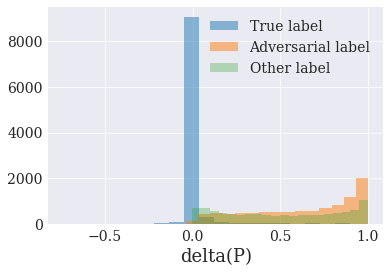

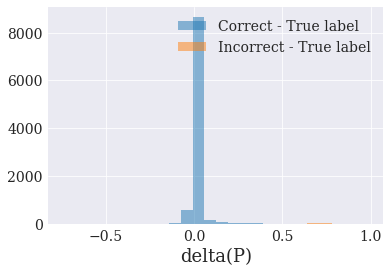

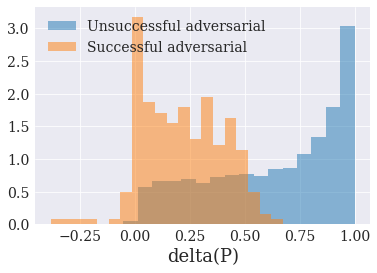

In [8]:
plt_diff_hist(diff_df_fgsm_fgsm, log_flag)

## CIFAR10

## CIFAR_PGD_PGD

In [10]:
log_flag = False
unnormallized_nml_flag = True
diff_df_cifar_pgd_pgd = load_diff_df(cifar_pgd_pgd_fgsm_all, log_flag, unnormallized_nml_flag)

['./../results/paper/CIFAR/table1/cifar_adversarial_results_20190810_134149/results_cifar_adversarial_20190810_134149.json']
log_flag: False unnormallized_nml_flag: True
number of idxs to replace to second largest: 3738


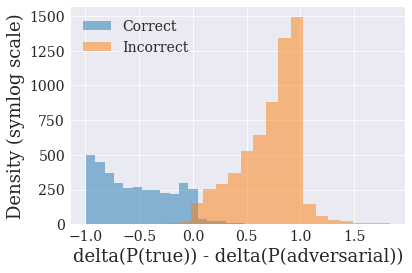

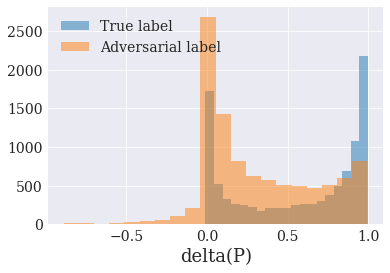

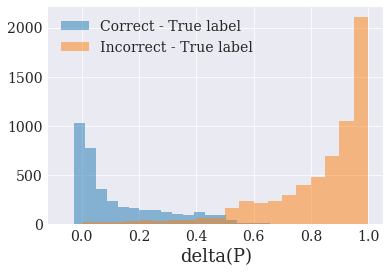

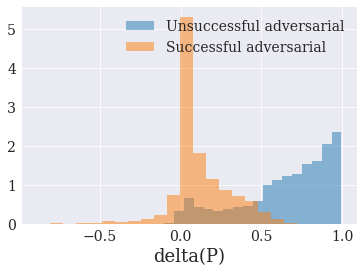

In [11]:
plt_diff_hist(diff_df_cifar_pgd_pgd, log_flag)

## CIFAR_PGD_FGSM

In [15]:
log_flag = False
unnormallized_nml_flag = True
diff_df_cifar_pgd_fgsm = load_diff_df(cifar_pgd_fgsm_fgsm_all, log_flag, unnormallized_nml_flag)

['./../results/paper/CIFAR/table1/cifar_adversarial_results_20190810_193501/results_cifar_adversarial_20190810_193501.json']
log_flag: False unnormallized_nml_flag: True
number of idxs to replace to second largest: 4788


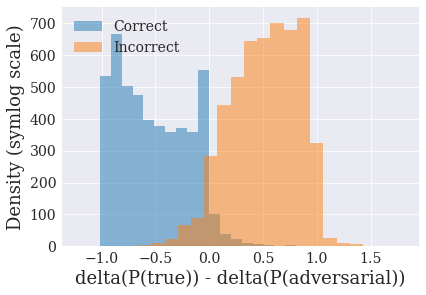

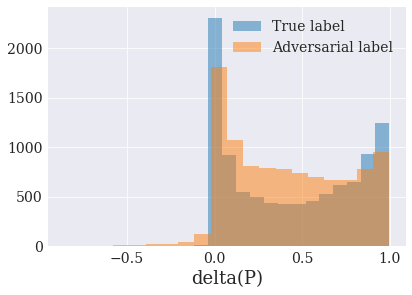

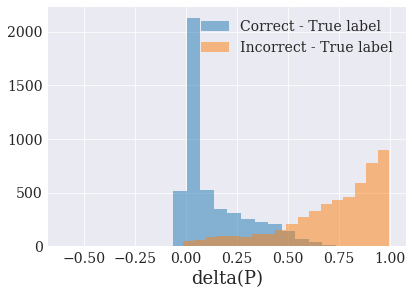

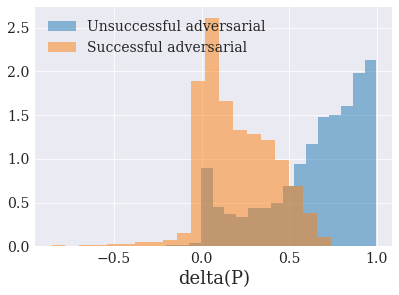

In [16]:
plt_diff_hist(diff_df_cifar_pgd_fgsm, log_flag)

## CIFAR_PGD_NATURAL

In [25]:
log_flag = False
unnormallized_nml_flag = True
diff_df_cifar_pgd_natural = load_diff_df(cifar_pgd_natural_fgsm_all, log_flag, unnormallized_nml_flag)

['./../results/paper/CIFAR/table1/cifar_adversarial_results_20190810_175715/results_cifar_adversarial_20190810_175715.json']
log_flag: False unnormallized_nml_flag: True
number of idxs to replace to second largest: 8430


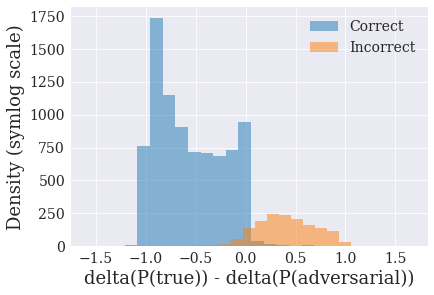

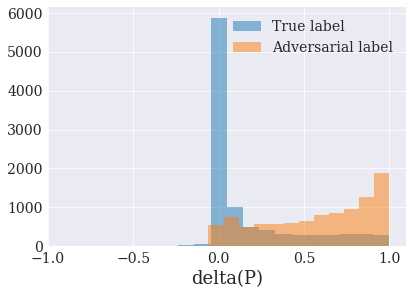

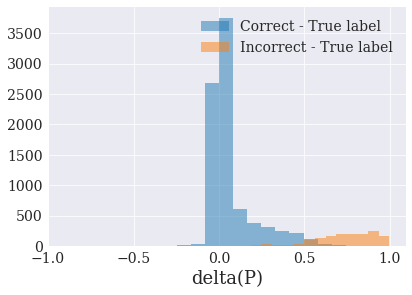

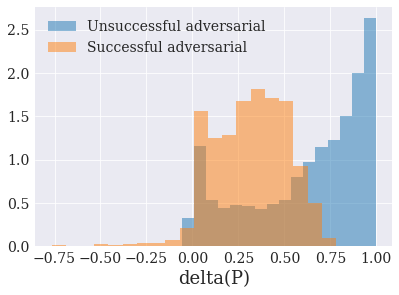

In [26]:
plt_diff_hist(diff_df_cifar_pgd_natural, log_flag)